# Ford GoBike Data Exploration
## By Anita Maskara

# Investigation Overview

The analysis uses the data pertaining to trips on Ford GoBike for the year 2018. The major aim is to understand the following.

- <a href = "#q1">Q1. Growth pattern in 2018 </a>   

- <a href = "#q2">Q2. Analysis of number of rides by subscribers vs customers during weekdays and weekends </a>   
    
- <a href = "#q3">Q3. Trend in number of rides by subscribers across different age groups</a>       
- <a href = "#q4">Q4. Average trip duration and average distance of subscribers vs customers </a>  
- <a href = "#q5">Q5. Bike rentals analyzed by age group,day of week, hour of day </a>

# Dataset Overview

The dataset includes data for the year 2018. It has $1863721 $ rows and $16$ columns. 
Each row represents a trip which is anonymized and includes:

Trip Duration (seconds)<br>
Start Time and Date<br>
End Time and Date<br>
Start Station ID<br>
Start Station Name<br>
Start Station Latitude<br>
Start Station Longitude<br>
End Station ID<br>
End Station Name<br>
End Station Latitude<br>
End Station Longitude<br>
Bike ID<br>
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)<br>
Member Year of Birth<br>
Member Gender
Bike share for all

'Bike share for all' is a program which is offered by Ford goBike to sponsor low income people who meet certain criteria. Bike Share for All is available to Bay Area residents ages 18 and older who qualify for Calfresh, SFMTA (Low Income) Lifeline Passes or PG&E CARE utility discount. 

There are $11771$ rows that have missing values in `end_station_name`, `end_station_id`, `start_station_name`, and `start_station_id`. These rows are deleted before undertaking any analysis. 

Also `member_birth_year` and `member_gender` have missing values in $110718$ and $110367$ rows respectively. Since we cannot impute these values, we will drop rows that have missing values.

After dropping these rows, the dataset has $1741556$ rows.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set_context("talk")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df_2018 = pd.read_csv('C:\\Users\\aabha.DESKTOP-HG6KK17\\Downloads\\2018-fordgobike-tripdata\\2018FordGoBike.csv')

df = df_2018.copy()

In [ ]:
df['duration_min']=df['duration_sec']/60

df['start_station_id'] = df['start_station_id'].astype(int)

df['end_station_id'] = df['end_station_id'].astype(int)

In [ ]:
df['age'] = 2019-df['member_birth_year']

df = df[df['age'] <=60]

df['age_group'] = df['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

# converting age_group from object datatype to category datatype
df['age_group']=df['age_group'].astype('category')


In [ ]:
# Convert `start_time` and `end_time` to datetime datatype

df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

# extracting year and month from start_time
df['start_time_year_month'] =df['start_time'].apply(lambda x:x.strftime('%Y-%m'))

# extracting hour from start_time
df['hour']=df['start_time'].apply(lambda timeStamp:timeStamp.hour)

df['month']=pd.DatetimeIndex(df['start_time']).month

def season(month):
    if month in (3,4,5):
        season = "spring"
    elif month in (6,7,8):
        season = "summer"
    elif month in (9,10,11):
        season = "fall"
    else:
        season = "winter"
    return season                                         

df['season'] = df['month'].apply(season)

In [ ]:
# extracting weekday from start_time
df['start_time_weekday']=df['start_time'].dt.weekday_name

dmap={'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed', 'Thursday':'Thu','Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun'}
df['start_time_weekday'] = df['start_time_weekday'].map(dmap)

# extracting hour from start_time
df['start_time_hour'] = df['start_time'].dt.hour

# Converting `start_time_weekday` to categorical datatype
weekdays_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays = pd.api.types.CategoricalDtype(ordered =True, categories = weekdays_order)
df['start_time_weekday'] = df['start_time_weekday'].astype(weekdays)

### Analysis of the growth pattern in 2018

In [ ]:
data = pd.DataFrame(df.groupby('start_time_year_month')['bike_id'].count())

# rotating the labels on x=axis
# using index from groupby result to use as labels for x-axis
plt.figure(figsize=(14,4))
data['bike_id'].plot('line')
x = data.index
y = data['bike_id']
sns.pointplot(x=x, y=y, color='g')
plt.tight_layout()
plt.xlabel('year_month', fontsize=16)
plt.ylabel('Number of bike rides', fontsize =16)
plt.title('Trend in number of bike rides over time', fontsize=16)
plt.xticks(rotation =45);

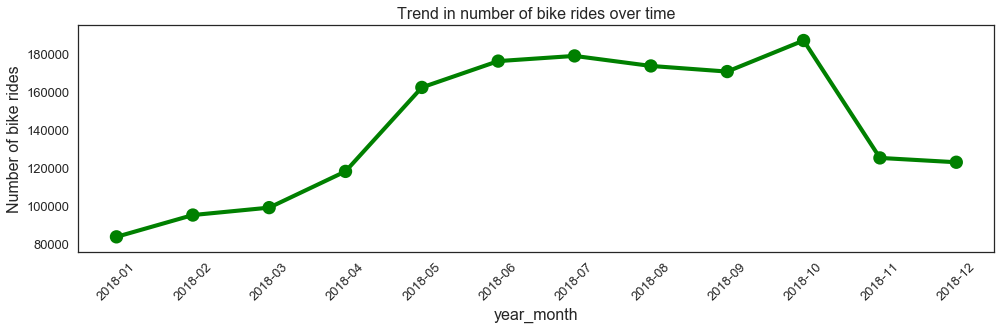

### Distribution of trips across different age groups

**Interpretation:** Majority of the riders fall in the age group of 20 to 40 years old. The lower age group and the higher age groups have relatively fewer bike rentals.

In [ ]:
base_color = sns.color_palette()[6]
cat_order = df['age_group'].value_counts().index
sns.countplot(data = df, x = 'age_group', color = base_color, order = cat_order)
plt.title('Distribution of riders in different age groups', fontsize=16);

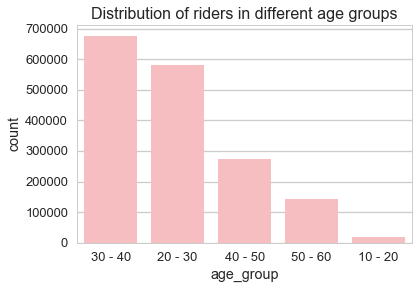

### Distribution of trip duration (in minutes)

**Interpretation:** As we can easily interpret from this plot, the trip duration is around 10 minutes indicating that majority of the riders tend to rent a bike for short trips.

In [ ]:
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of trip duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

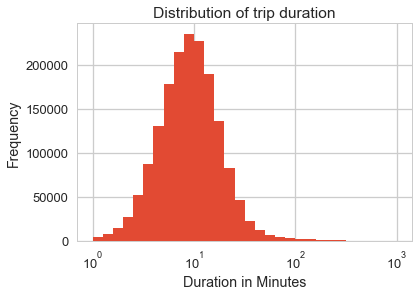

### Customer Segmentation by type and gender

**Interpretation:** A large majority of the bike rentals are from subscribers who use the bikes to fulfill their conveyance needs.Subscribers accounted for 88.6$\%$ of total number of bike rides in 2018 while customers accounted for the remaining 11.4$\%$

A large majority of the bike riders are male. My first thought was that maybe the design of the bike is not suitable for females. In order to dig deeper, I looked up the images of the bikes used on Google images. The bike design does not appear to be a problem. 

**Recommendation:** Ford GoBike should conduct a survey among the present female bike riders to understand which features of the bikes they find to be appealing and what changes the company should bring about in order to increase the usage of the bikes among female riders. 

In [ ]:
labels = "Subscriber", "Customer"
sizes = [np.sum(df['user_type'] == "Subscriber"), np.sum(df['user_type'] == "Customer")]
colors = ['lightskyblue','lightgreen']
explode = (0.3, 0.0,)  # explode 1st slice
plt.figure(figsize=(4,4))
# Plot
plt.title('Proportion of Subscribers vs Customers', fontsize=16)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

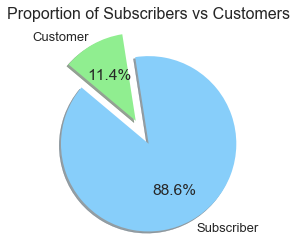

In [ ]:
plt.figure(figsize=(10,4))
sns.set_style('white')

base_color = sns.color_palette()[5]
sns.countplot(data = df, x = 'member_gender', color = base_color)
sns.despine(left=True)

# add annotations
n_points = df.shape[0]
cat_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-15, pct_string, ha = 'center', color = 'b', fontsize=16)
    
plt.title('Percentage of bike rides per gender', fontsize=18, y=1.015)
plt.ylabel('', labelpad=16)
plt.xlabel('Gender', labelpad=16)
plt.xticks(rotation=360);

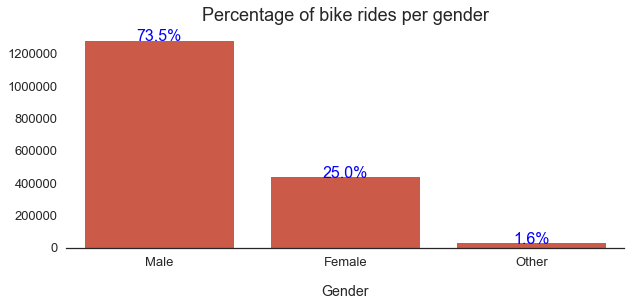

### Distribution of trips across seasons

**Interpretation:** People prefer to ride more during summer and fall season when the weather is also conducive. Pollen allergies during spring season is quite common in these areas and that might be one reason for low number of bike rides during spring. Winters are also not preferred because of the cold and windy weather conditions. 

In [ ]:
season_classes = ['spring', 'summer', 'fall', 'winter']
sclasses = pd.api.types.CategoricalDtype(ordered =True, categories = season_classes)
df['season'] = df['season'].astype(sclasses)


base_color = sns.color_palette()[0]
df.groupby('season')['bike_id'].count().plot(kind='bar',color=base_color)
plt.xticks(rotation = 360)
plt.title('Frequency of bike rides during each season', fontsize =18);

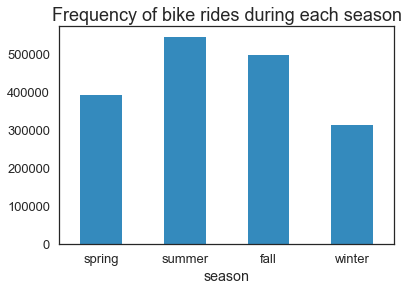

### Average trip duration and average distance of subscribers vs customers

**Interpretation:** The average distance (in miles) is very similar for both the user types, but the average trip duration for customers (26 minutes) is more than two times the average trip duration for subscribers (11 minutes). The average trip duration traveled by customers is more than double that of subscribers irrespective of weekday or weekend

In [ ]:
!pip install geopy

def distance(origin_lat, origin_long, destination_lat, destination_long):
    coords_1 = (origin_lat, origin_long)
    coords_2 = (destination_lat, destination_long)
    
    distance = geopy.distance.vincenty(coords_1, coords_2).miles
    return distance

# applying distance function to create distance_miles_estimates
df['distance_miles_estimates'] = df.apply(lambda x: distance(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)

round(df.groupby('user_type')['distance_miles_estimates'].mean(),3)

plt.subplot(1,2,1)

new_color=['orange', 'blue']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(12,4))
ax.set_title('Average trip duration per user type', fontsize=22, y=1.015)
ax.set_ylabel('User type', labelpad=16)
ax.set_xlabel('Average trip duration (in minutes)', labelpad=16);

plt.subplot(1,2,2)
new_color=['orange', 'blue']
ax = df.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(12,4))
ax.set_title('Average distance per user type', fontsize=22, y=1.015)
ax.set_ylabel(' ')
ax.set_xlabel('Average distance (in miles)', labelpad=16)
ax.yaxis.set_visible(False);


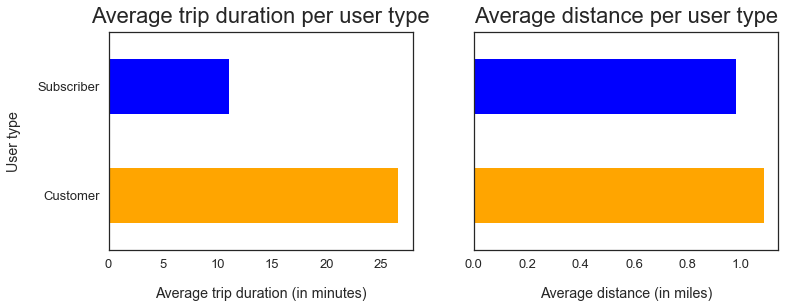

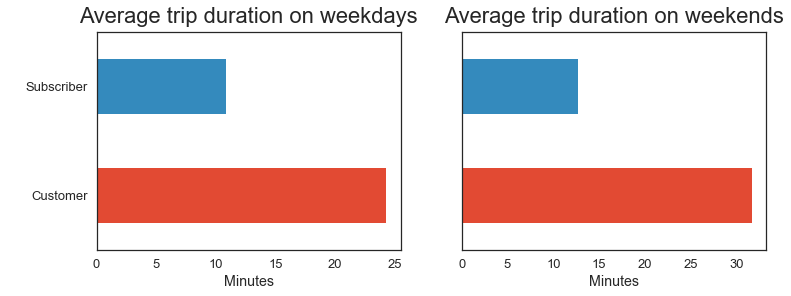

### Distribution of trip duration across gender and user_type

As can be seen in the boxplot below, trip duration for female customers is higher than male customers. Infact, this trend can be noticed in the female subscribers as well. Another point to note here is that trip duration for female customers is higher than female subscribers.

In [ ]:
g = sns.factorplot(x="user_type", y="duration_sec", hue="member_gender", kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('User_type')
g.set_ylabels('duration in seconds')
plt.show()

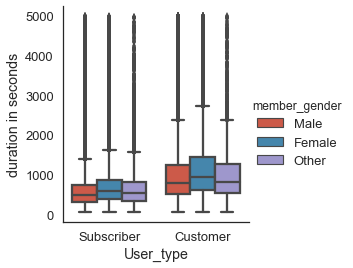

### Trend in number of rides by subscribers across different age groups

The number of bike rides increase steadily for all the age groups till May. Between May and October, the highest growth happens for age group of 20-30 and 30-40. The remaining three groups have marginal increase between May and October. After October, the growth for all age groups tapers off. The weather plays a key role in this pattern. During the spring months and summer months, the number of rides increase. With the onset of autumn season, the number of rides start to decline gradually.

The top two age groups across the twelve month period are `20-30` and `30-40`. Customers in these age groups have consistently taken more number of rides than the other age groups.

In [ ]:
level_order = ['10-20', '20-30', '30-40', '40-50', '50-60']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['age_group'] = df['age_group'].astype(ordered_cat)

subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(['start_time_year_month', 'age_group'])['bike_id'].count().reset_index()
subscriber_age_df.head()

plt.figure(figsize=(12,7))
ax = sns.pointplot(data=subscriber_age_df, x='start_time_year_month', y='bike_id', hue='age_group', scale=.6)
plt.title("The monthly trend of bike rides per subscribers' age group", fontsize=22, y=1.015)
plt.xlabel('year-month', fontsize=16)
plt.ylabel('Number of rides', fontsize=16)
leg = ax.legend()
leg.set_title('Age group',prop={'size':16})
ax = plt.gca();

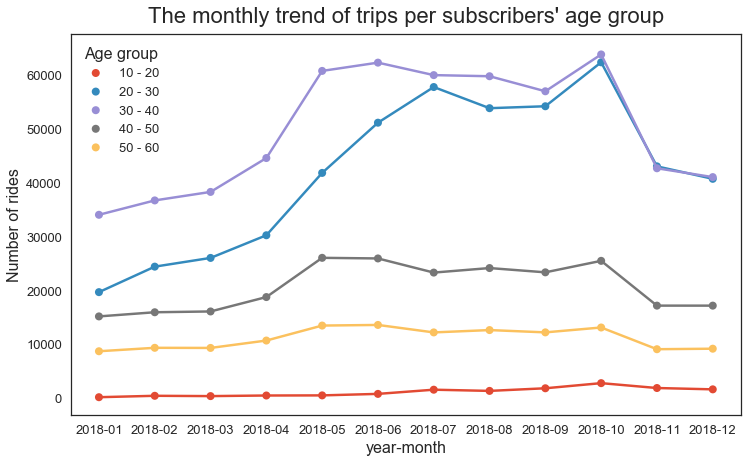

### Analysis of number of rides for each user type during weekdays and weekends

Subscribers ride more during the hours of 7:00 am to 9:00 am and 16:00 pm - 19:00 pm on weekdays. Customers ride more during the hours of 16:00 pm and 19:00 pm. This coincides with the peak hours for traveling to and from office. The usage pattern is distinctly different between the two user types on weekends. Customers ride more during the hours of 10:00 am to 17:00 pm on weekends.

In [ ]:
ct_counts = df[df['user_type']=='Subscriber'].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts = ct_counts[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

ct_counts_customer = df[df['user_type']=='Customer'].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts_customer = ct_counts_customer[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

sol_string = ["The usage pattern is distinctly different between the two user types as can be seen from these heatmaps."]
print((" ").join(sol_string))

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.suptitle('Peak hours for each user type', fontsize=22)
sns.heatmap(ct_counts, cmap="Blues")
plt.title("Peak hours for Subscribers", y=1.015, fontsize = 18)
plt.xlabel('Days of week', fontsize=16)
plt.ylabel('Hour of the day', fontsize =16)
plt.yticks(rotation =360)

plt.subplot(1,2,2)
sns.heatmap(ct_counts_customer, cmap="Blues", cbar_kws={'label': 'Peak hours'})
plt.title("Peak hours for Customers", y=1.015, fontsize =18)
plt.xlabel('Days of week', fontsize=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

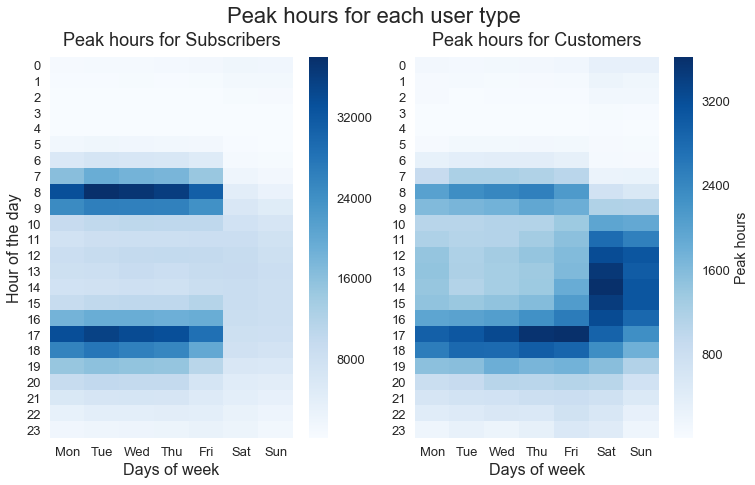

### Bike rentals analyzed by age group,day of week, hour of day

The peak hours are same across the three age groups. In the evening, the only noticable difference is that the number of bike rentals is relatively high for 20-30 years old during the hour of 20:00 pm as compared to other two age groups. This is a younger age group with higher energy. As people age they tend to have lower energy by the end of the day.

In [ ]:
ct_counts_20_30 = df[(df['age_group']=='20 - 30') & (df['user_type']=='Subscriber')].groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].count().unstack()
ct_counts_20_30 = ct_counts_20_30[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

ct_counts_30_40 = df[(df['age_group']=='30 - 40')& (df['user_type']=='Subscriber')].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts_30_40 = ct_counts_30_40[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

ct_counts_40_50 = df[(df['age_group']=='40 - 50') & (df['user_type']=='Subscriber')].groupby(['start_time_hour', 'start_time_weekday']).count()['bike_id'].unstack()
ct_counts_40_50 = ct_counts_40_50[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.suptitle('Bike rentals analyzed by age group, days of week, hour of day', fontsize=30, y=0.95)
sns.heatmap(ct_counts_20_30, fmt='d', annot=True, cmap='YlGnBu', annot_kws={"size": 12})
plt.title("20-30 years old", y=1.015)
plt.xlabel('Days of week', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)

plt.subplot(1,3,2)
sns.heatmap(ct_counts_30_40, fmt='d', annot=True, cmap='YlGnBu', annot_kws={"size": 12})
plt.title("30-40 years old", y=1.015)
plt.xlabel('Days of week', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)

plt.subplot(1,3,3)
sns.heatmap(ct_counts_40_50, fmt='d', annot=True, cmap='YlGnBu', annot_kws={"size": 12})
plt.title("40-50 years old", y=1.015)
plt.xlabel('Days of week', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

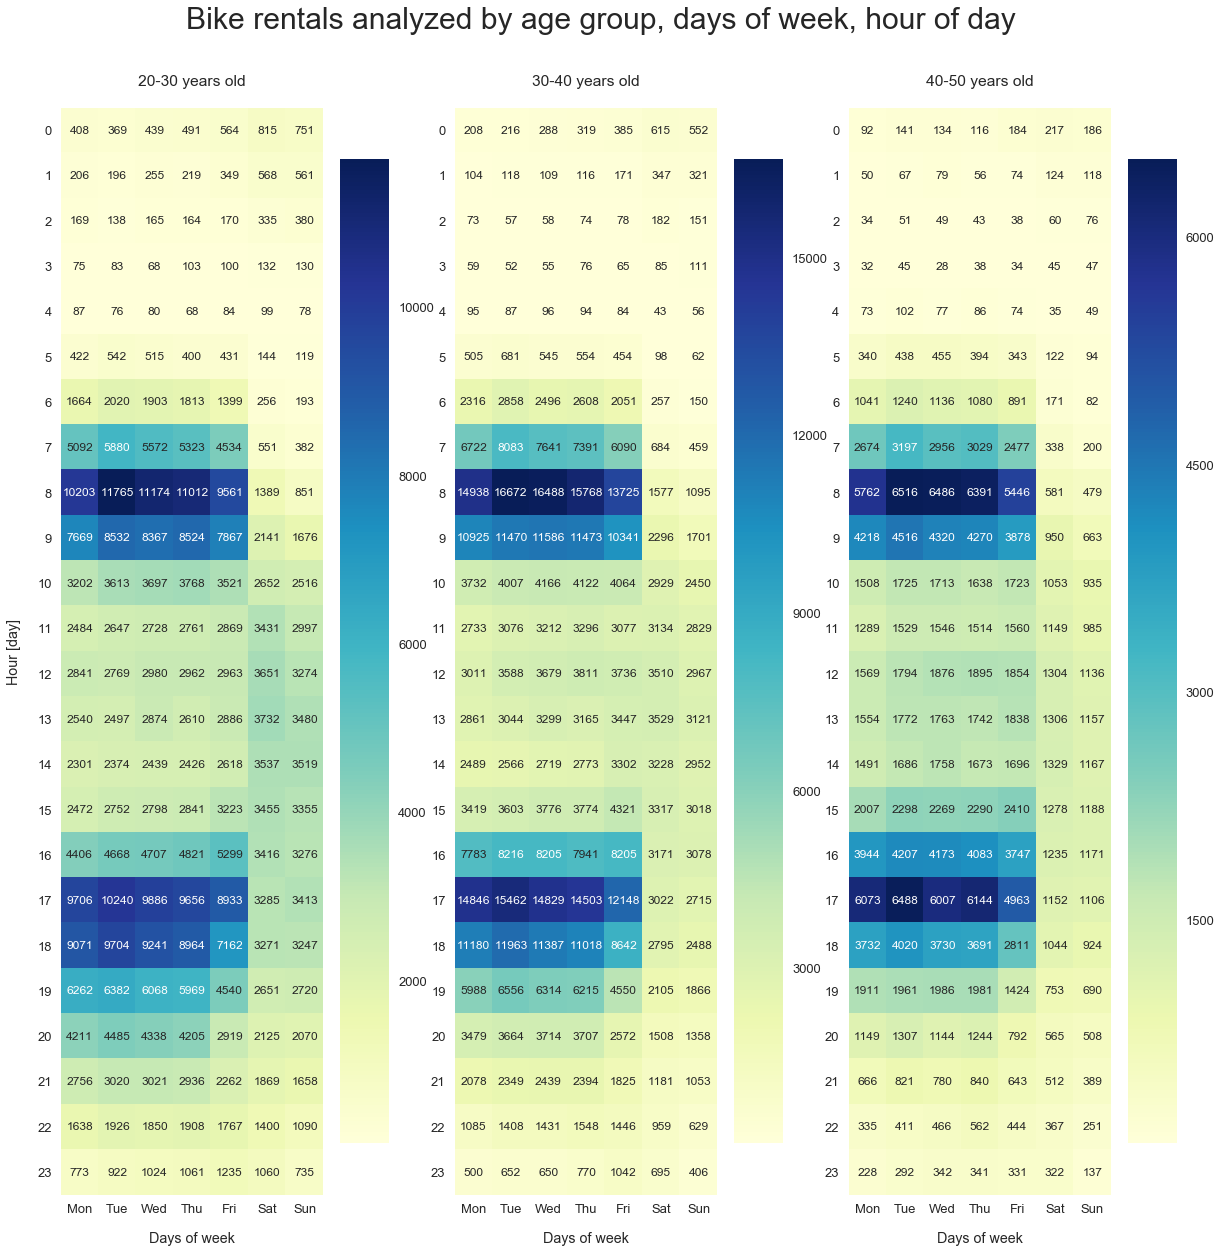

In [ ]:
jupyter nbconvert Ford Go Bike Slide Deck.ipynb --to slides --post serve --template output_toggle